In [90]:
!pip install visualkeras

You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [91]:
import visualkeras
import pandas as pd
df=pd.read_csv('Train.csv',
               usecols=['ClassId','Path','Width','Height']).rename(columns={"ClassId": "label",
                                                                            "Path": "path"})

test=pd.read_csv('Test.csv',usecols=['ClassId','Path']).rename(columns={"ClassId": "label"})


print(df.head())
print('\n-----------No. of Classes-----------')
print(df.label.nunique())

   Width  Height  label                            path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png

-----------No. of Classes-----------
43


In [3]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /Users/aashish/opt/anaconda3/lib/python3.7/site-packages (2.4.1)
You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:

pip install tf-nightly

ERROR: Could not find a version that satisfies the requirement tf-nightly (from versions: none)
ERROR: No matching distribution found for tf-nightly
You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import tensorflow as tf
# Training path for images to grab
train_img_path='Train'
# Define Std batch size of 32
batch_size = 32

# As images size vary from 26 X 26 to 173 X 173, use std img size
img_height = 26
img_width = 26

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_img_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_img_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [94]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


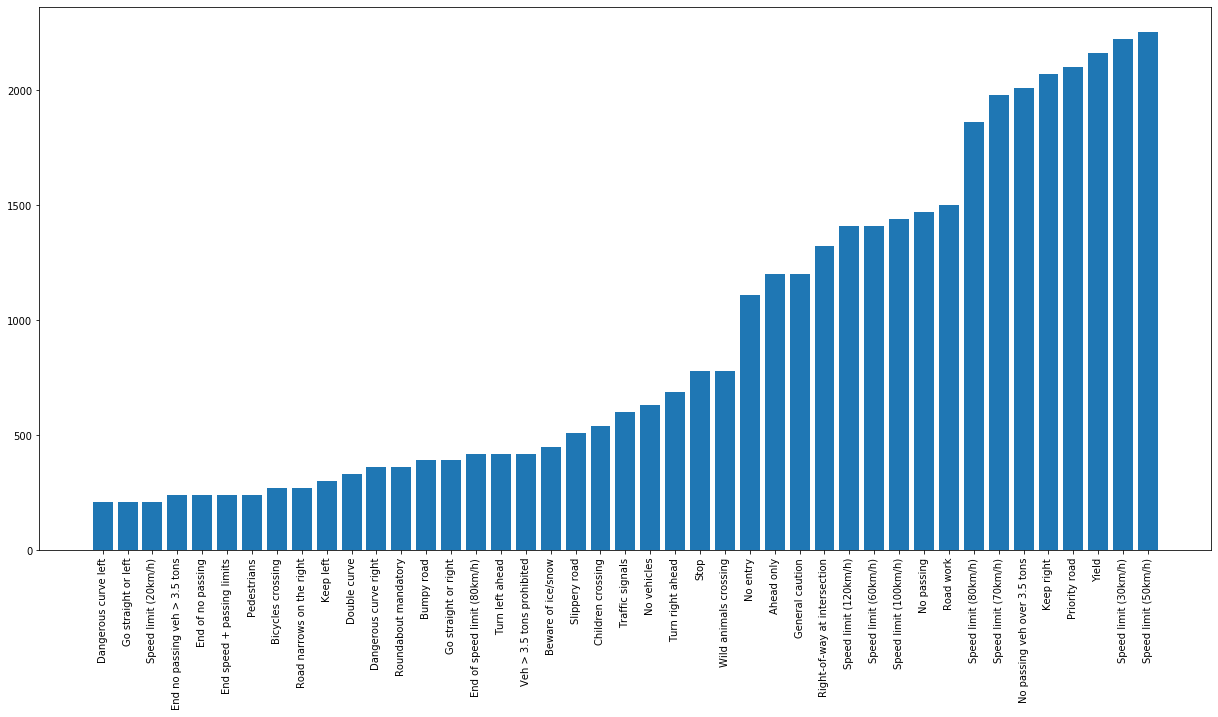

In [95]:
import os
import matplotlib.pyplot as plt
folders = os.listdir(train_img_path)

train_number = []
class_num = []

for folder in range(43):
    train_files = os.listdir(train_img_path + '/' + str(folder))
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [96]:
test

,label,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png
...,...,...
12625,12,Test/12625.png
12626,33,Test/12626.png
12627,6,Test/12627.png
12628,7,Test/12628.png


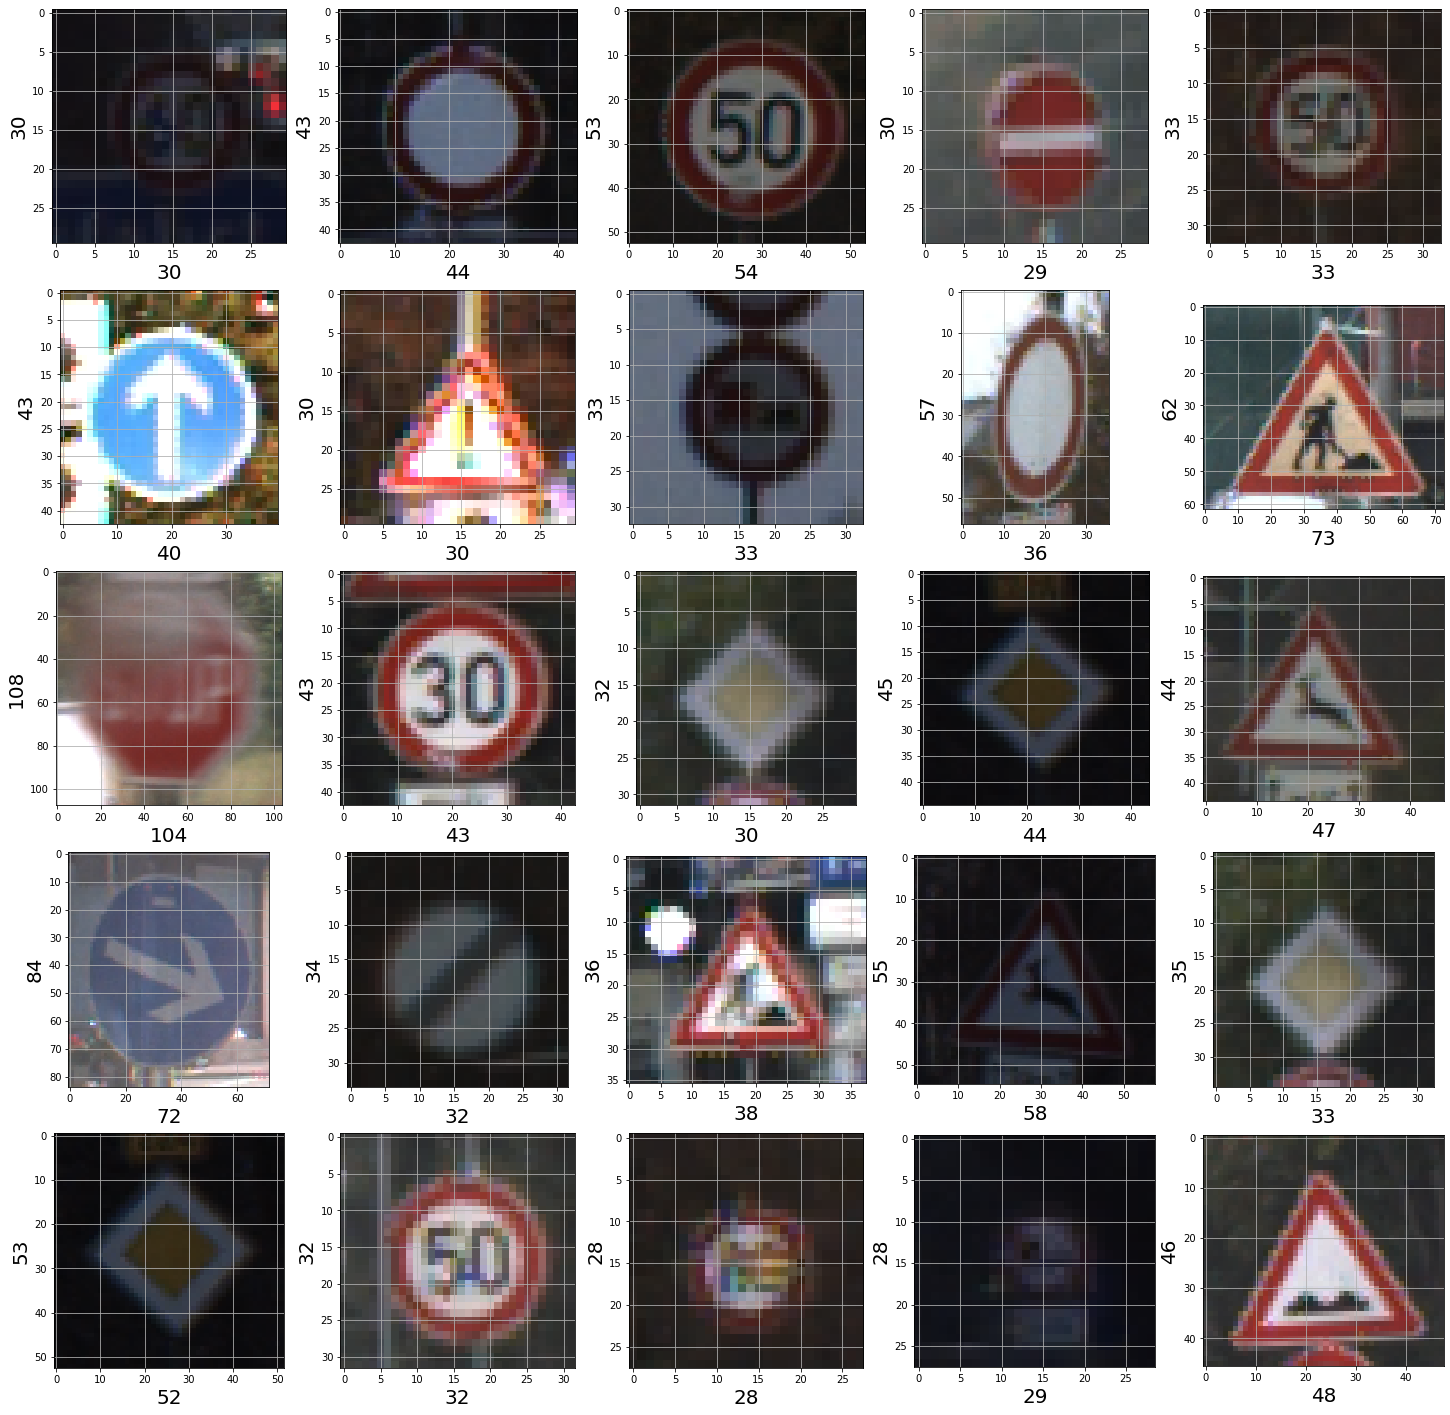

In [97]:
# Visualizing 25 random images from test data
input_path = ""
data_dir = input_path
import random
from matplotlib.image import imread

# test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values #test folder path

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

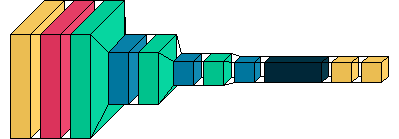

In [98]:
# Importing all essential lib
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

num_classes=43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomContrast(0.6),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


visualkeras.layered_view(model)

In [99]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 26, 26, 3)         0         
_________________________________________________________________
random_contrast_4 (RandomCon (None, 26, 26, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)        

In [100]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs,batch_size=32)


Epoch 1/10
981/981 [==============================] - 67s 67ms/step - loss: 2.5822 - accuracy: 0.2967 - val_loss: 0.5788 - val_accuracy: 0.8283
Epoch 2/10
981/981 [==============================] - 56s 57ms/step - loss: 0.5242 - accuracy: 0.8395 - val_loss: 0.2696 - val_accuracy: 0.9151
Epoch 3/10
981/981 [==============================] - 62s 63ms/step - loss: 0.2426 - accuracy: 0.9318 - val_loss: 0.1426 - val_accuracy: 0.9584
Epoch 4/10
981/981 [==============================] - 62s 63ms/step - loss: 0.1437 - accuracy: 0.9582 - val_loss: 0.1322 - val_accuracy: 0.9642
Epoch 5/10
981/981 [==============================] - 62s 63ms/step - loss: 0.1050 - accuracy: 0.9705 - val_loss: 0.1017 - val_accuracy: 0.9754
Epoch 6/10
981/981 [==============================] - 61s 62ms/step - loss: 0.0695 - accuracy: 0.9798 - val_loss: 0.0878 - val_accuracy: 0.9792
Epoch 7/10
981/981 [==============================] - 64s 65ms/step - loss: 0.0595 - accuracy: 0.9826 - val_loss: 0.1108 - val_accuracy:

In [89]:
from PIL import Image
#img = Image.open(test['Path'][0])
#img
#model.predict(img)
#model.predict(test)
predictions = model.evaluate(x=test['Path'], batch_size=50, verbose=1)
#predictions = np.argmax(predictions, 1)
predictions


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

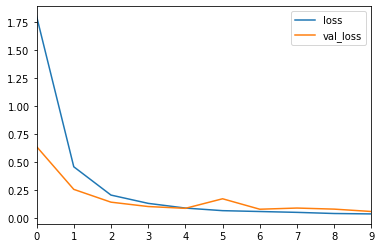

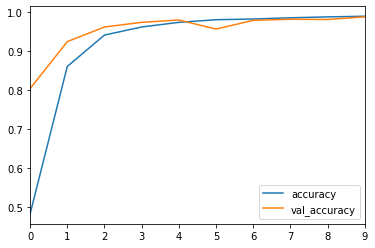

In [12]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [122]:
num_classes=43
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(26, 26, 3)))
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(500, activation='relu'))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(43, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [123]:
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 500)               1352500   
_________________________________________________________________
flatten_21 (Flatten)         (None, 500)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               64128     
_________________________________________________________________
dense_36 (Dense)             (None, 43)              

In [124]:
epochs=5
history = model1.fit(train_ds,validation_data=val_ds,epochs=epochs,batch_size=32)

Epoch 1/5


ValueError: in user code:

    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/aashish/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 43) are incompatible
